In [0]:
from google.colab import files
from google.colab import drive

In [0]:
!pip install fastai
!pip install kaggle

In [0]:
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" "https://storage.googleapis.com/kaggle-datasets/5839/18613/data.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1551615113&Signature=SjEu8PbMbXzvAw%2BxhyPZNUuPosIAelSnNrjTqBzLQp0A2tS3dlDNqPAvhk7B4i3BKczq1uHeLJBQXAeF8Qv6qxKvSigTNqUuZZZlM8GAP8W9DXfVKo3QcGL7reageaPa98HmdiJnLmdFLEYRuGQp8qSjw82d4%2BtnSphLTJirpV7zH9zcKGrTDuJOdjJ1dadhUh7wrxUeFSfVyquvt0zV6hRYDDM%2FOAjl9ehGiOvbWz8Tr7ldo9pTUNNmZrep9WCpUqYmDMzRqfEIipjz%2FgicO0tIHzZe%2FhwobG5H72Y47I3cuLjQgO1RjKSSE6%2BpGgdoYZ1vvy5Miop1PFBfa1ajTQ%3D%3D" -O "data.zip" -c

--2019-02-28 12:12:31--  https://storage.googleapis.com/kaggle-datasets/5839/18613/data.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1551615113&Signature=SjEu8PbMbXzvAw%2BxhyPZNUuPosIAelSnNrjTqBzLQp0A2tS3dlDNqPAvhk7B4i3BKczq1uHeLJBQXAeF8Qv6qxKvSigTNqUuZZZlM8GAP8W9DXfVKo3QcGL7reageaPa98HmdiJnLmdFLEYRuGQp8qSjw82d4%2BtnSphLTJirpV7zH9zcKGrTDuJOdjJ1dadhUh7wrxUeFSfVyquvt0zV6hRYDDM%2FOAjl9ehGiOvbWz8Tr7ldo9pTUNNmZrep9WCpUqYmDMzRqfEIipjz%2FgicO0tIHzZe%2FhwobG5H72Y47I3cuLjQgO1RjKSSE6%2BpGgdoYZ1vvy5Miop1PFBfa1ajTQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 2607:f8b0:4001:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45092348013 (42G) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  42.00G   125MB/s    in 5m 28s  

2019-02-28 12:17:59 (131 MB/s) - ‘data.zip’ saved [45092348013/45

In [0]:
!ls

data.zip


In [0]:
!mkdir data
!unzip data.zip -d data


  inflating: data/train_val_list.txt  
  inflating: data/images_010.zip     
  inflating: data/FAQ_CHESTXRAY.pdf  
  inflating: data/images_008.zip     
  inflating: data/test_list.txt      
  inflating: data/Data_Entry_2017.csv  
  inflating: data/images_005.zip     
  inflating: data/images_011.zip     
  inflating: data/images_007.zip     
  inflating: data/images_006.zip     
  inflating: data/BBox_List_2017.csv  
  inflating: data/LOG_CHESTXRAY.pdf  
  inflating: data/images_009.zip     
  inflating: data/images_004.zip     
  inflating: data/images_012.zip     
  inflating: data/images_002.zip     
  inflating: data/README_CHESTXRAY.pdf  
  inflating: data/images_003.zip     
  inflating: data/ARXIV_V5_CHESTXRAY.pdf  


In [0]:
!rm data.zip

In [0]:
!ls 'data'

ARXIV_V5_CHESTXRAY.pdf	images_002.zip	images_007.zip	images_012.zip
BBox_List_2017.csv	images_003.zip	images_008.zip	LOG_CHESTXRAY.pdf
Data_Entry_2017.csv	images_004.zip	images_009.zip	README_CHESTXRAY.pdf
FAQ_CHESTXRAY.pdf	images_005.zip	images_010.zip	test_list.txt
images_001.zip		images_006.zip	images_011.zip	train_val_list.txt


In [0]:
!mkdir xray

In [0]:
!cd xray

data  xray


In [0]:
!unzip -q data/images_001.zip -d xray
!unzip -q data/images_002.zip -d xray
!unzip -q data/images_003.zip -d xray
!unzip -q data/images_004.zip -d xray
!unzip -q data/images_005.zip -d xray
!unzip -q data/images_006.zip -d xray
!unzip -q data/images_007.zip -d xray
!unzip -q data/images_008.zip -d xray
!unzip -q data/images_009.zip -d xray
!unzip -q data/images_010.zip -d xray
!unzip -q data/images_011.zip -d xray
!unzip -q data/images_012.zip -d xray

!rm data/*.zip

In [0]:
! ls 'xray/images'

In [0]:
from fastai.vision import *

In [0]:
df = pd.read_csv('data/Data_Entry_2017.csv')[['Image Index', 'Finding Labels']]

In [0]:
df.columns = ['name', 'label']

In [0]:
df.tail()

,name,label
112115,00030801_001.png,Mass|Pneumonia
112116,00030802_000.png,No Finding
112117,00030803_000.png,No Finding
112118,00030804_000.png,No Finding
112119,00030805_000.png,No Finding


In [0]:
ds_tfms=get_transforms(do_flip = True)
data = ImageDataBunch.from_df('xray/images', df = df, size=128, ds_tfms = ds_tfms,  label_delim='|').normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.densenet121 , metrics=[accuracy])

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06


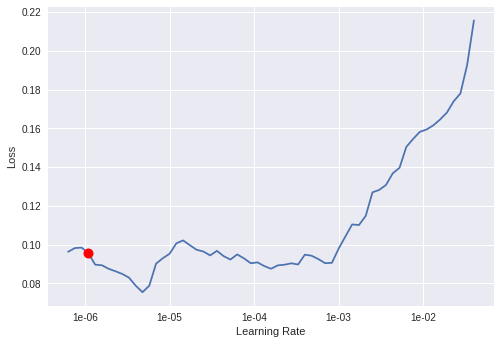

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(15, slice(1.10E-06, 1.40E-06))

epoch,train_loss,valid_loss,accuracy
1,0.072848,0.088353,0.970278
2,0.074491,0.093604,0.969319
3,0.074633,0.092215,0.970278
4,0.066852,0.087998,0.970278
5,0.068054,0.075108,0.975072
6,0.070483,0.089583,0.968360
7,0.073142,0.084169,0.970278
8,0.070225,0.074193,0.974113


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f5dc2496438>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f5dc2496438>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", 

KeyboardInterrupt: ignored

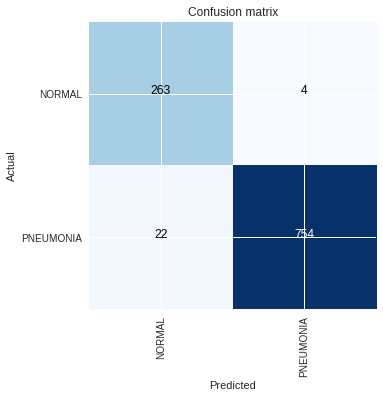

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()